In Depth: Decision Trees and Random Forests
Source: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

In [2]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')



This code sets up the environment to display Matplotlib plots inline in a Jupyter Notebook, imports necessary libraries (NumPy and Matplotlib), and applies a specific style ('seaborn-v0_8-whitegrid') to Matplotlib plots.

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\s3bas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


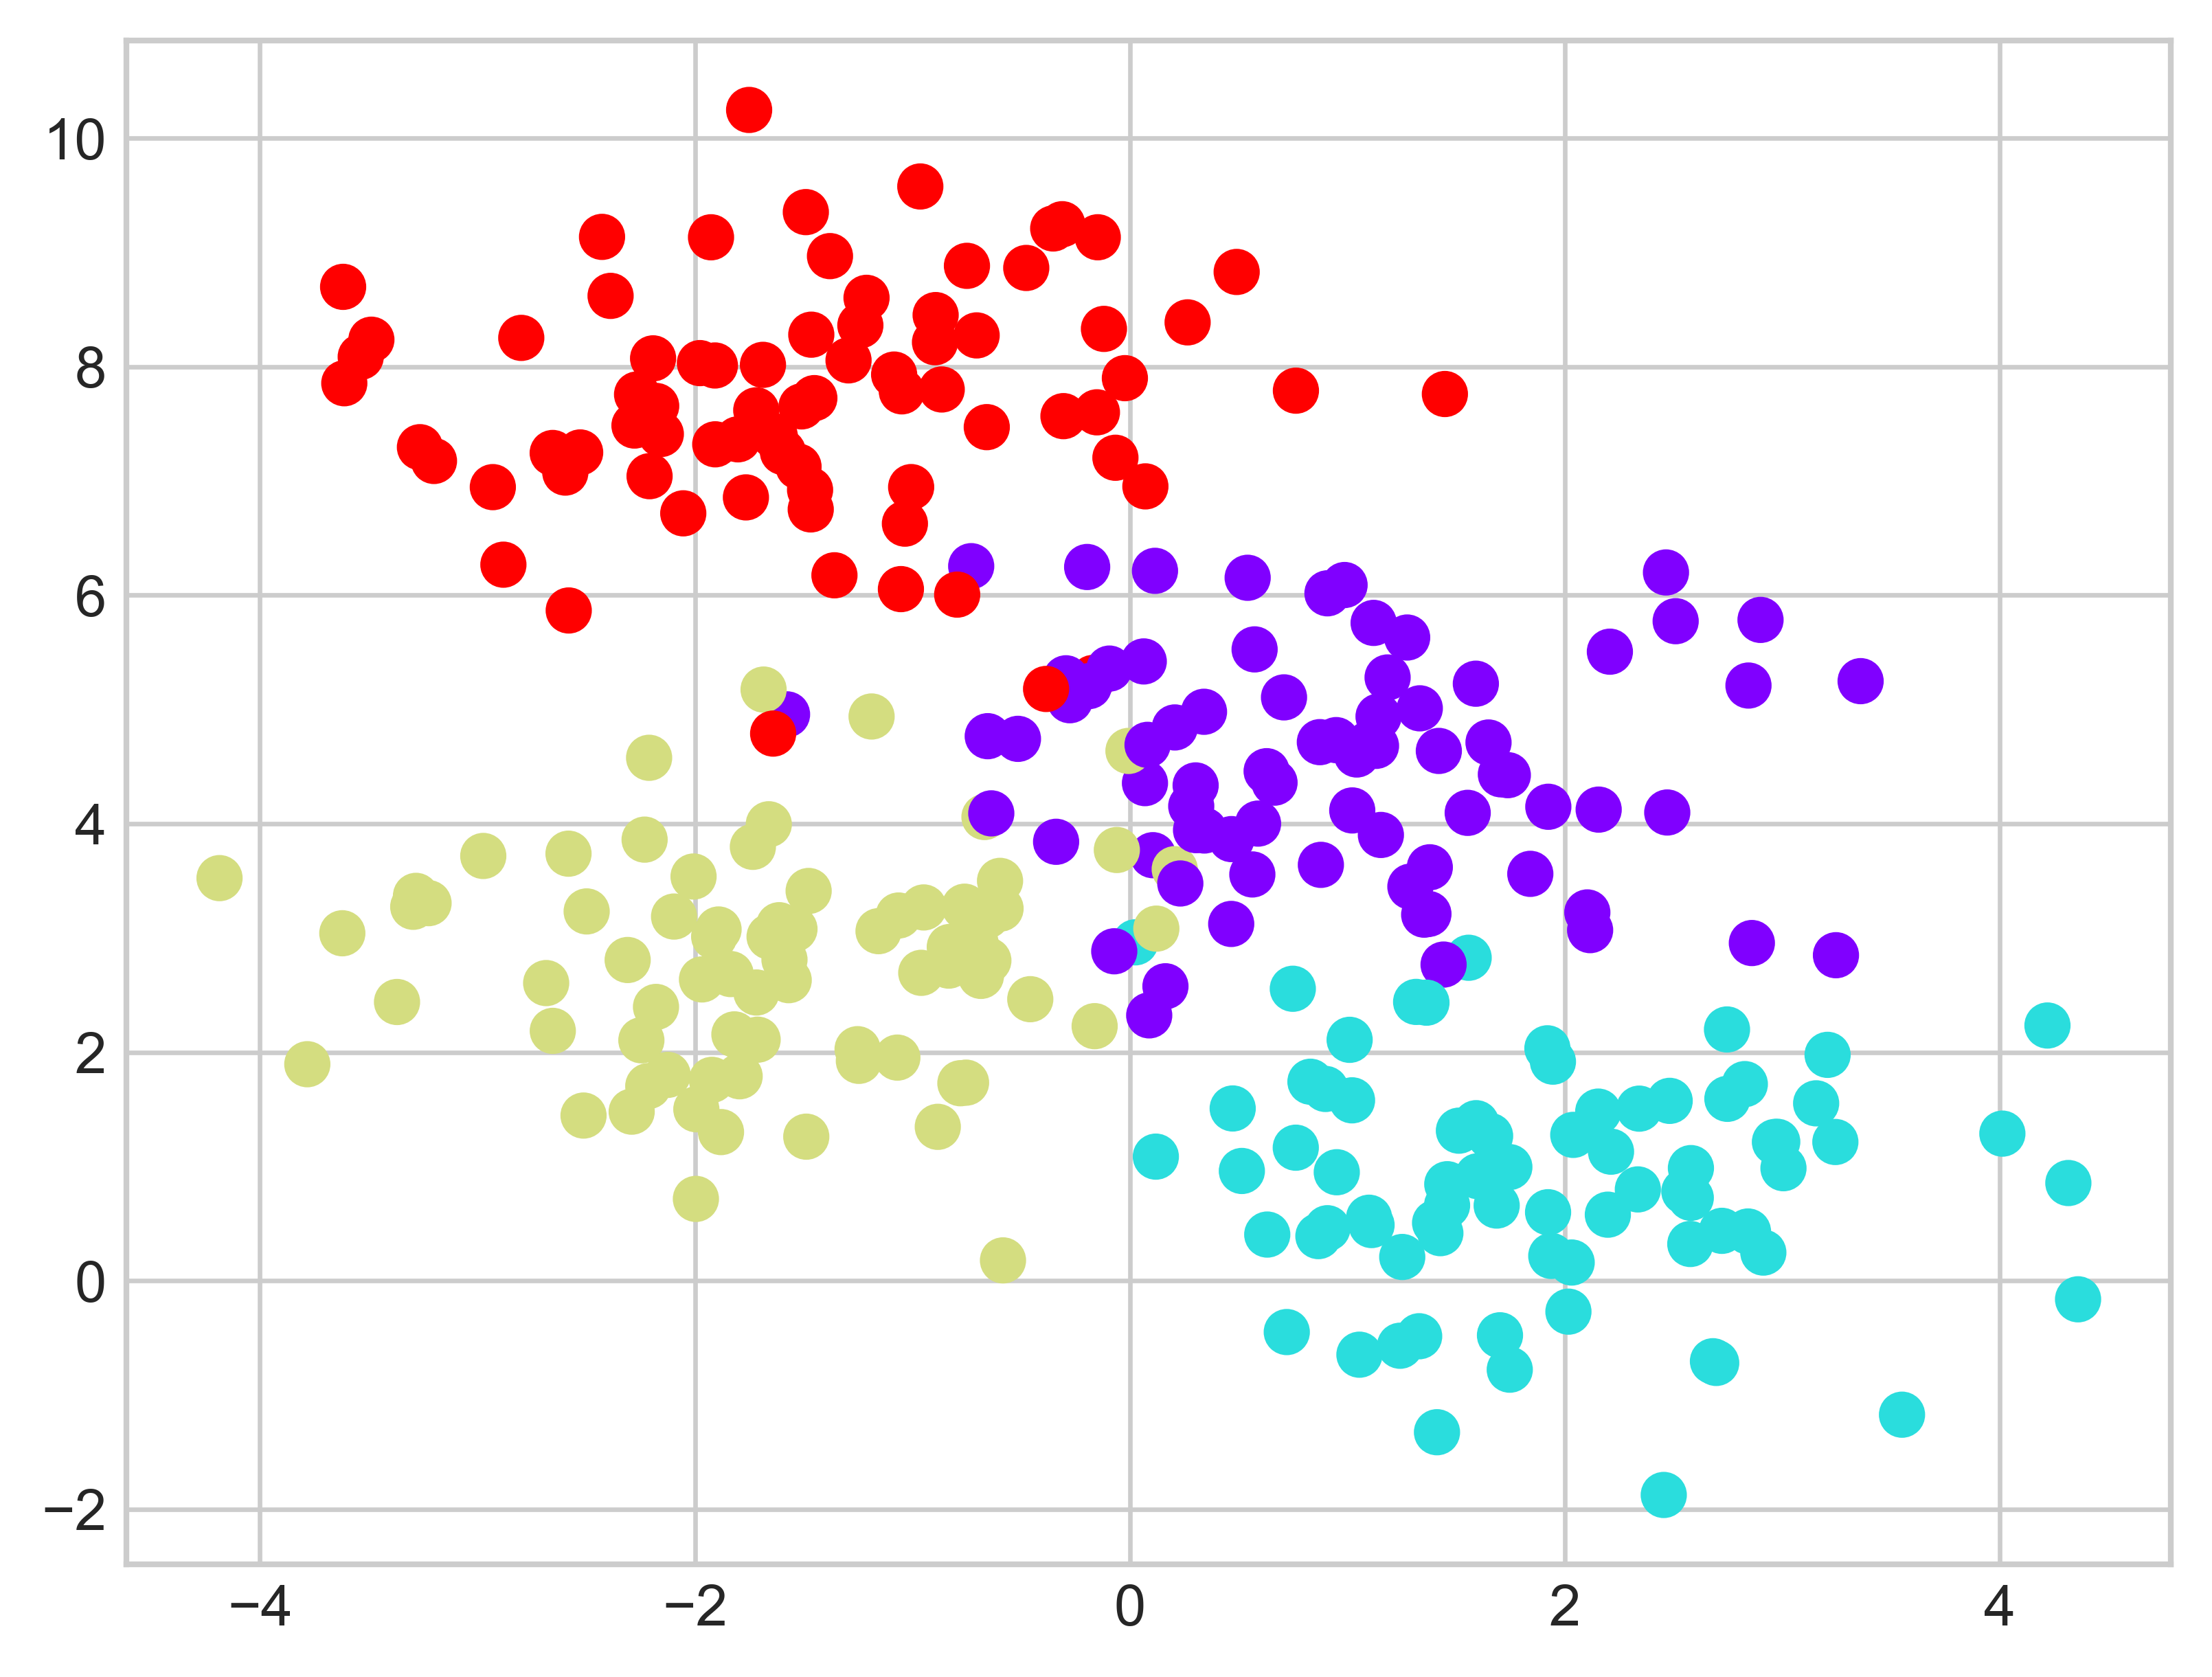

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

This code generates 300 data points distributed across four clusters using the make_blobs function from scikit-learn, then creates a scatter plot to visualize these points with different colors representing each cluster.

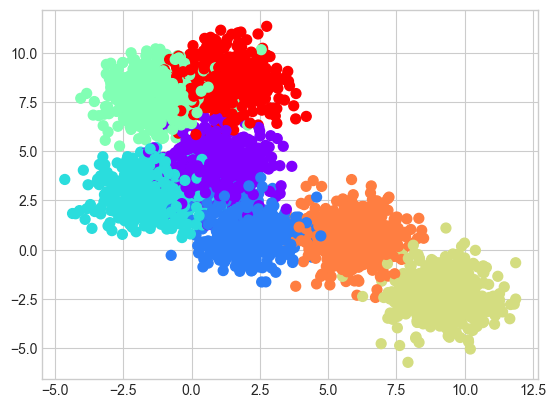

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=3000, centers=7,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)



This creates a Decision Tree classifier model and fits it to the provided dataset X (features) and y (labels).

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

This Python function named visualize_classifier takes a machine learning model, features (X), labels (y), an optional axis (ax), and a colormap (cmap) as inputs. It creates a scatter plot of the training points, fits the provided model to the data, and generates a color plot representing the model's predictions on a meshgrid of points within the plot's boundaries, showing decision boundaries or regions for different classes. Finally, it returns the plot with the training points and decision regions for the classifier.

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

The visualize_classifier function is being called with a DecisionTreeClassifier model instantiated, along with the features X and labels y as arguments. This function will create a scatter plot of the training points and visualize the decision boundaries generated by the Decision Tree classifier for the provided dataset X and y.

In [ ]:


# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);



In [ ]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

creates a Bagging classifier ensemble, using DecisionTreeClassifier as the base estimator. The BaggingClassifier constructs 100 decision tree classifiers (estimators) where each tree is trained on a subset of the dataset (80% of the samples, sampled with replacement). The 'random_state' parameter sets the seed for random number generation for reproducibility.

The BaggingClassifier is then fitted to the dataset (X, y), and the visualize_classifier function is called to visualize the decision boundaries created by the BaggingClassifier ensemble on the given dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

RandomForestClassifier from scikit-learn's ensemble module. It instantiates a random forest classifier model with 100 decision tree estimators and sets the 'random_state' parameter to 0 for reproducibility.

Following the model instantiation, the code calls the 'visualize_classifier' function, passing the RandomForestClassifier model along with the features 'X' and labels 'y' as arguments. This function is likely designed to generate a visualization displaying the decision boundaries produced by the Random Forest classifier on the given dataset.

In [ ]:


rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');



generates synthetic data using NumPy and Matplotlib.
rng = np.random.RandomState(42) initializes a random number generator.
x = 10 * rng.rand(200) creates an array of 200 random values between 0 and 10.
The model function defines a synthetic model that combines two sine waves (one oscillating quickly and one slowly) with added noise controlled by the sigma parameter.
y = model(x) generates the dependent variable y using the model function based on the values of x.
plt.errorbar(x, y, 0.3, fmt='o') creates an errorbar plot where x is on the x-axis, y is on the y-axis, and 0.3 specifies the error bar length. It visualizes the generated synthetic data points (x, y) with error bars of length 0.3. The fmt='o' argument indicates that the data points should be displayed as circles.

In [ ]:


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);



In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

scikit-learn's load_digits function to load a sample dataset called "digits," which contains handwritten digits in a format suitable for machine learning tasks. After loading the dataset, digits.keys() is used to display the available keys in the dataset.



In [ ]:


# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))



In [ ]:


from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)



scikit-learn's train_test_split function to split the digit dataset loaded using load_digits into training and testing subsets.

In [ ]:


from sklearn import metrics
print(metrics.classification_report(ypred, ytest))



The metrics.classification_report function from scikit-learn generates a text report showing the main classification metrics for a classification model's performance.

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');



scikit-learn's confusion_matrix function to compute the confusion matrix based on the predicted labels (ypred) and the true labels (ytest). It then uses Seaborn's heatmap function to visualize the confusion matrix.

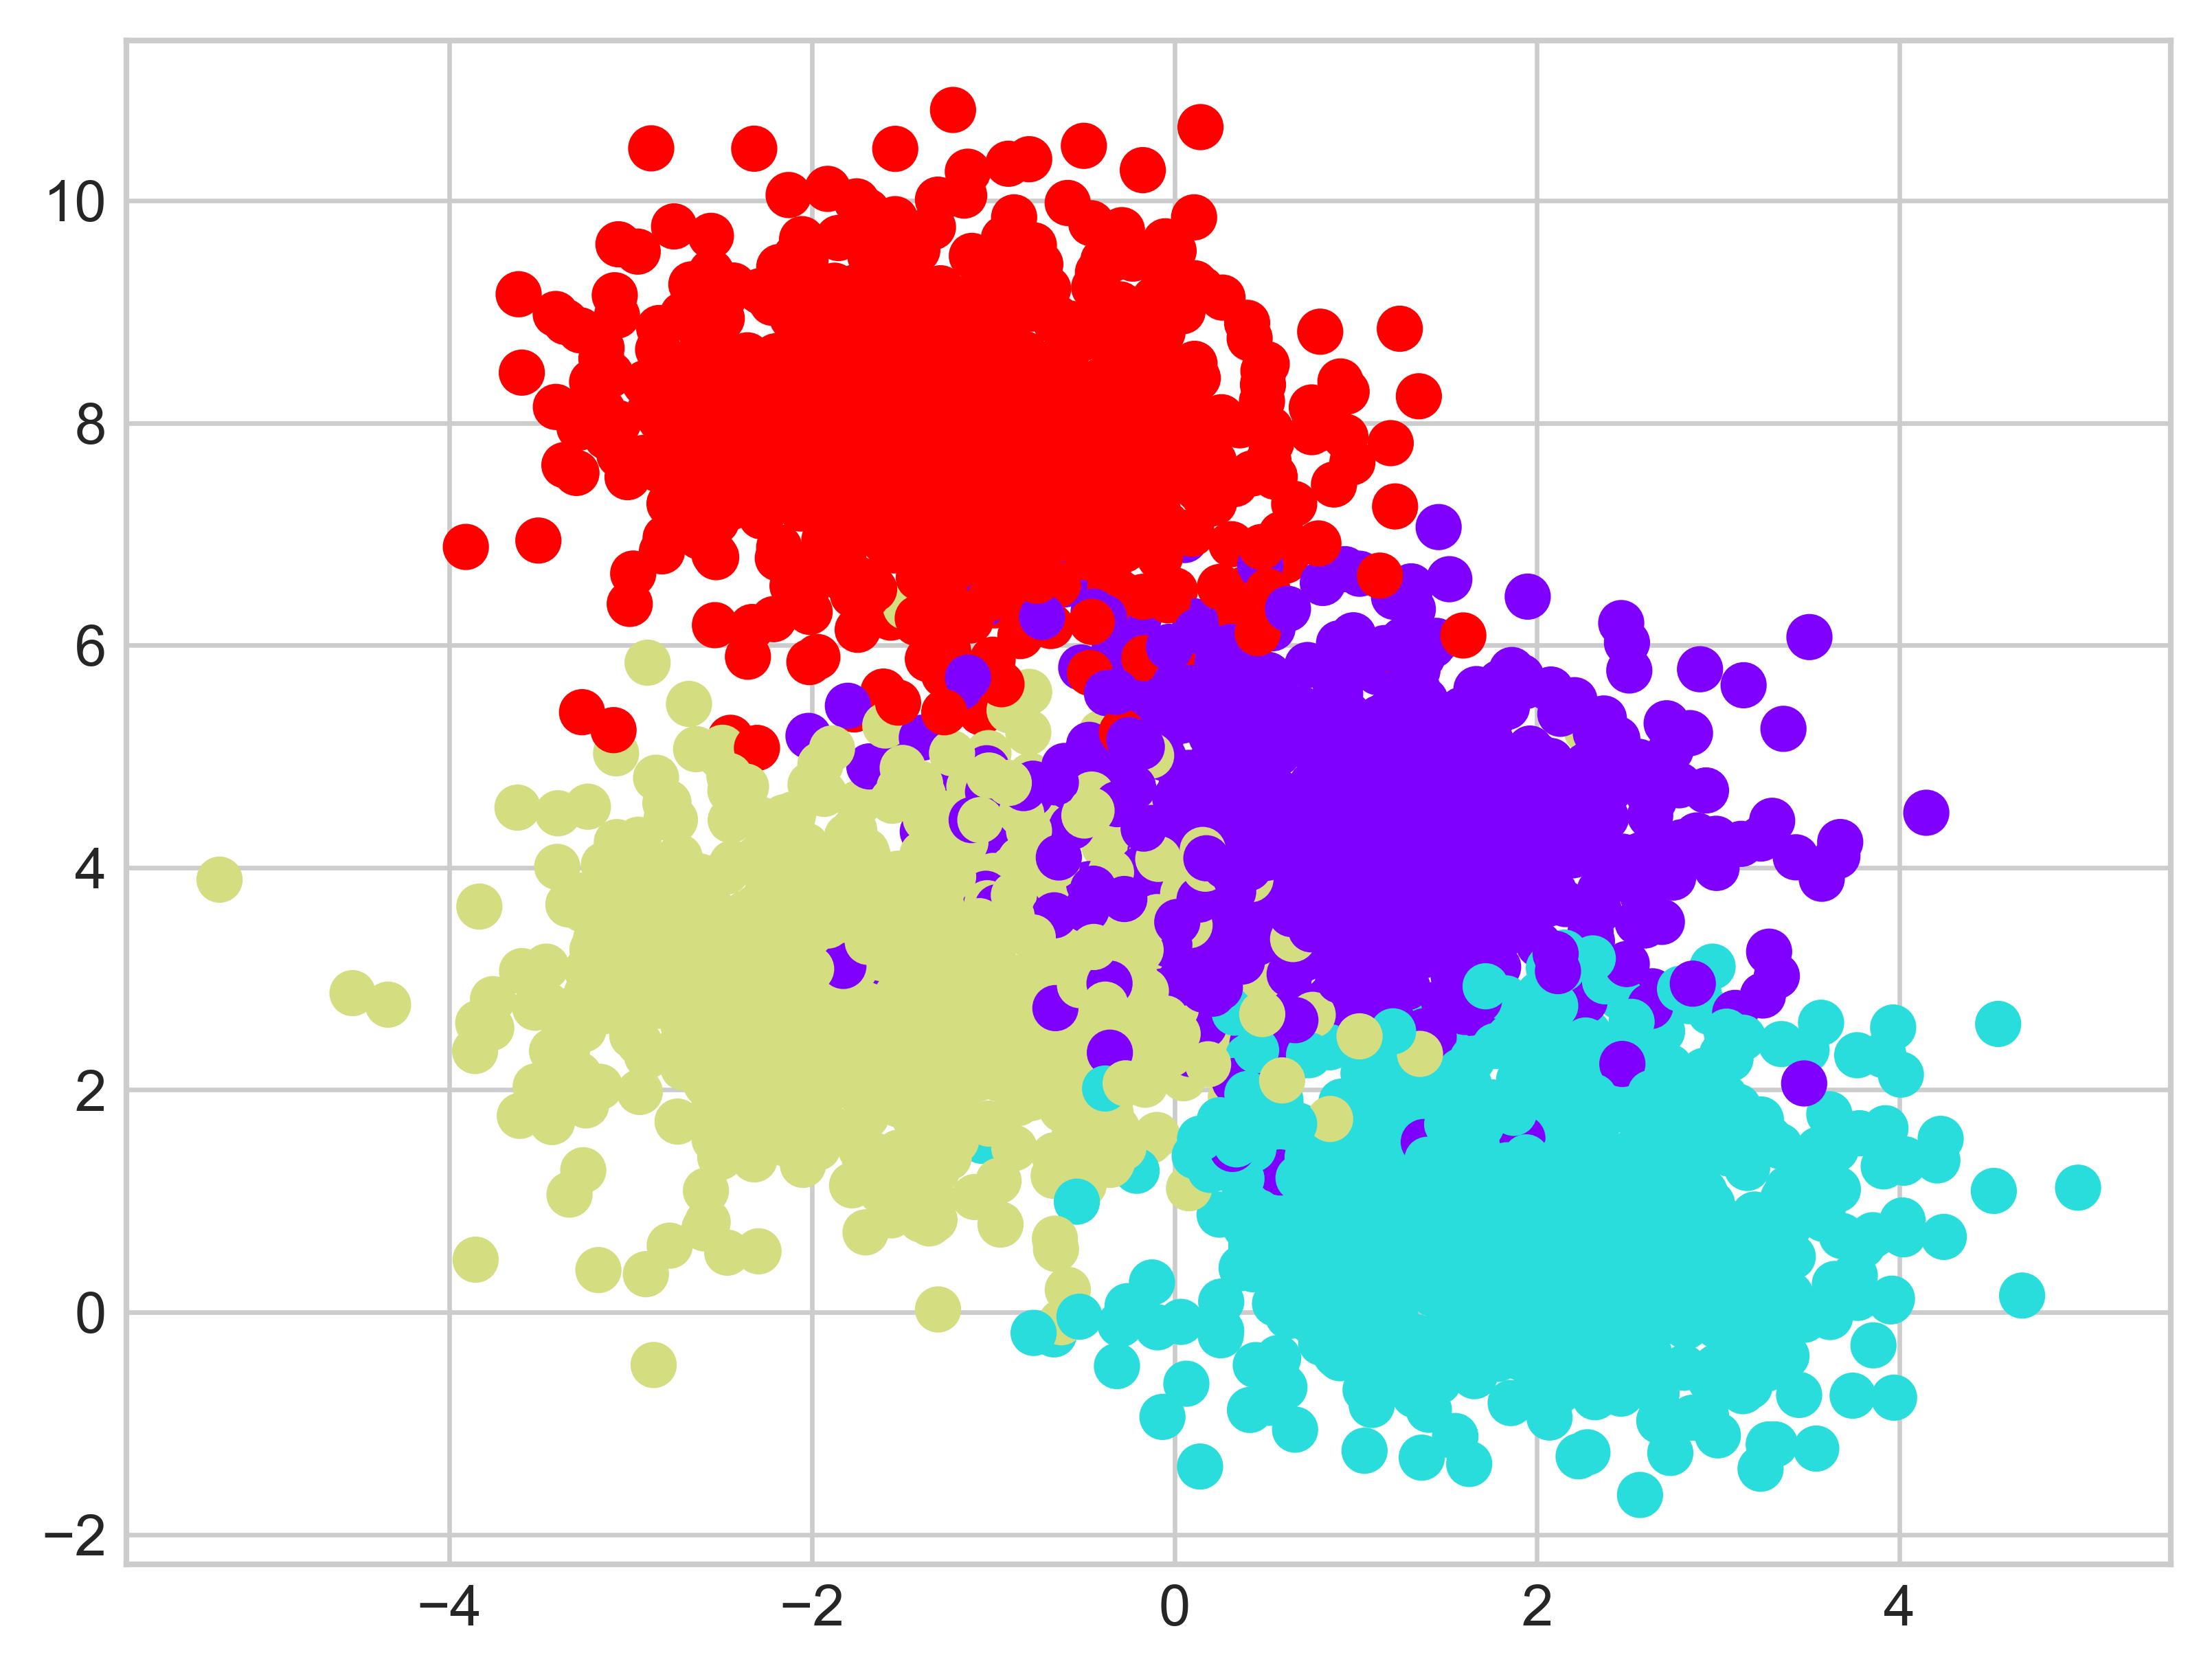

In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=3000, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



C:\Users\s3bas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\s3bas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\s3bas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

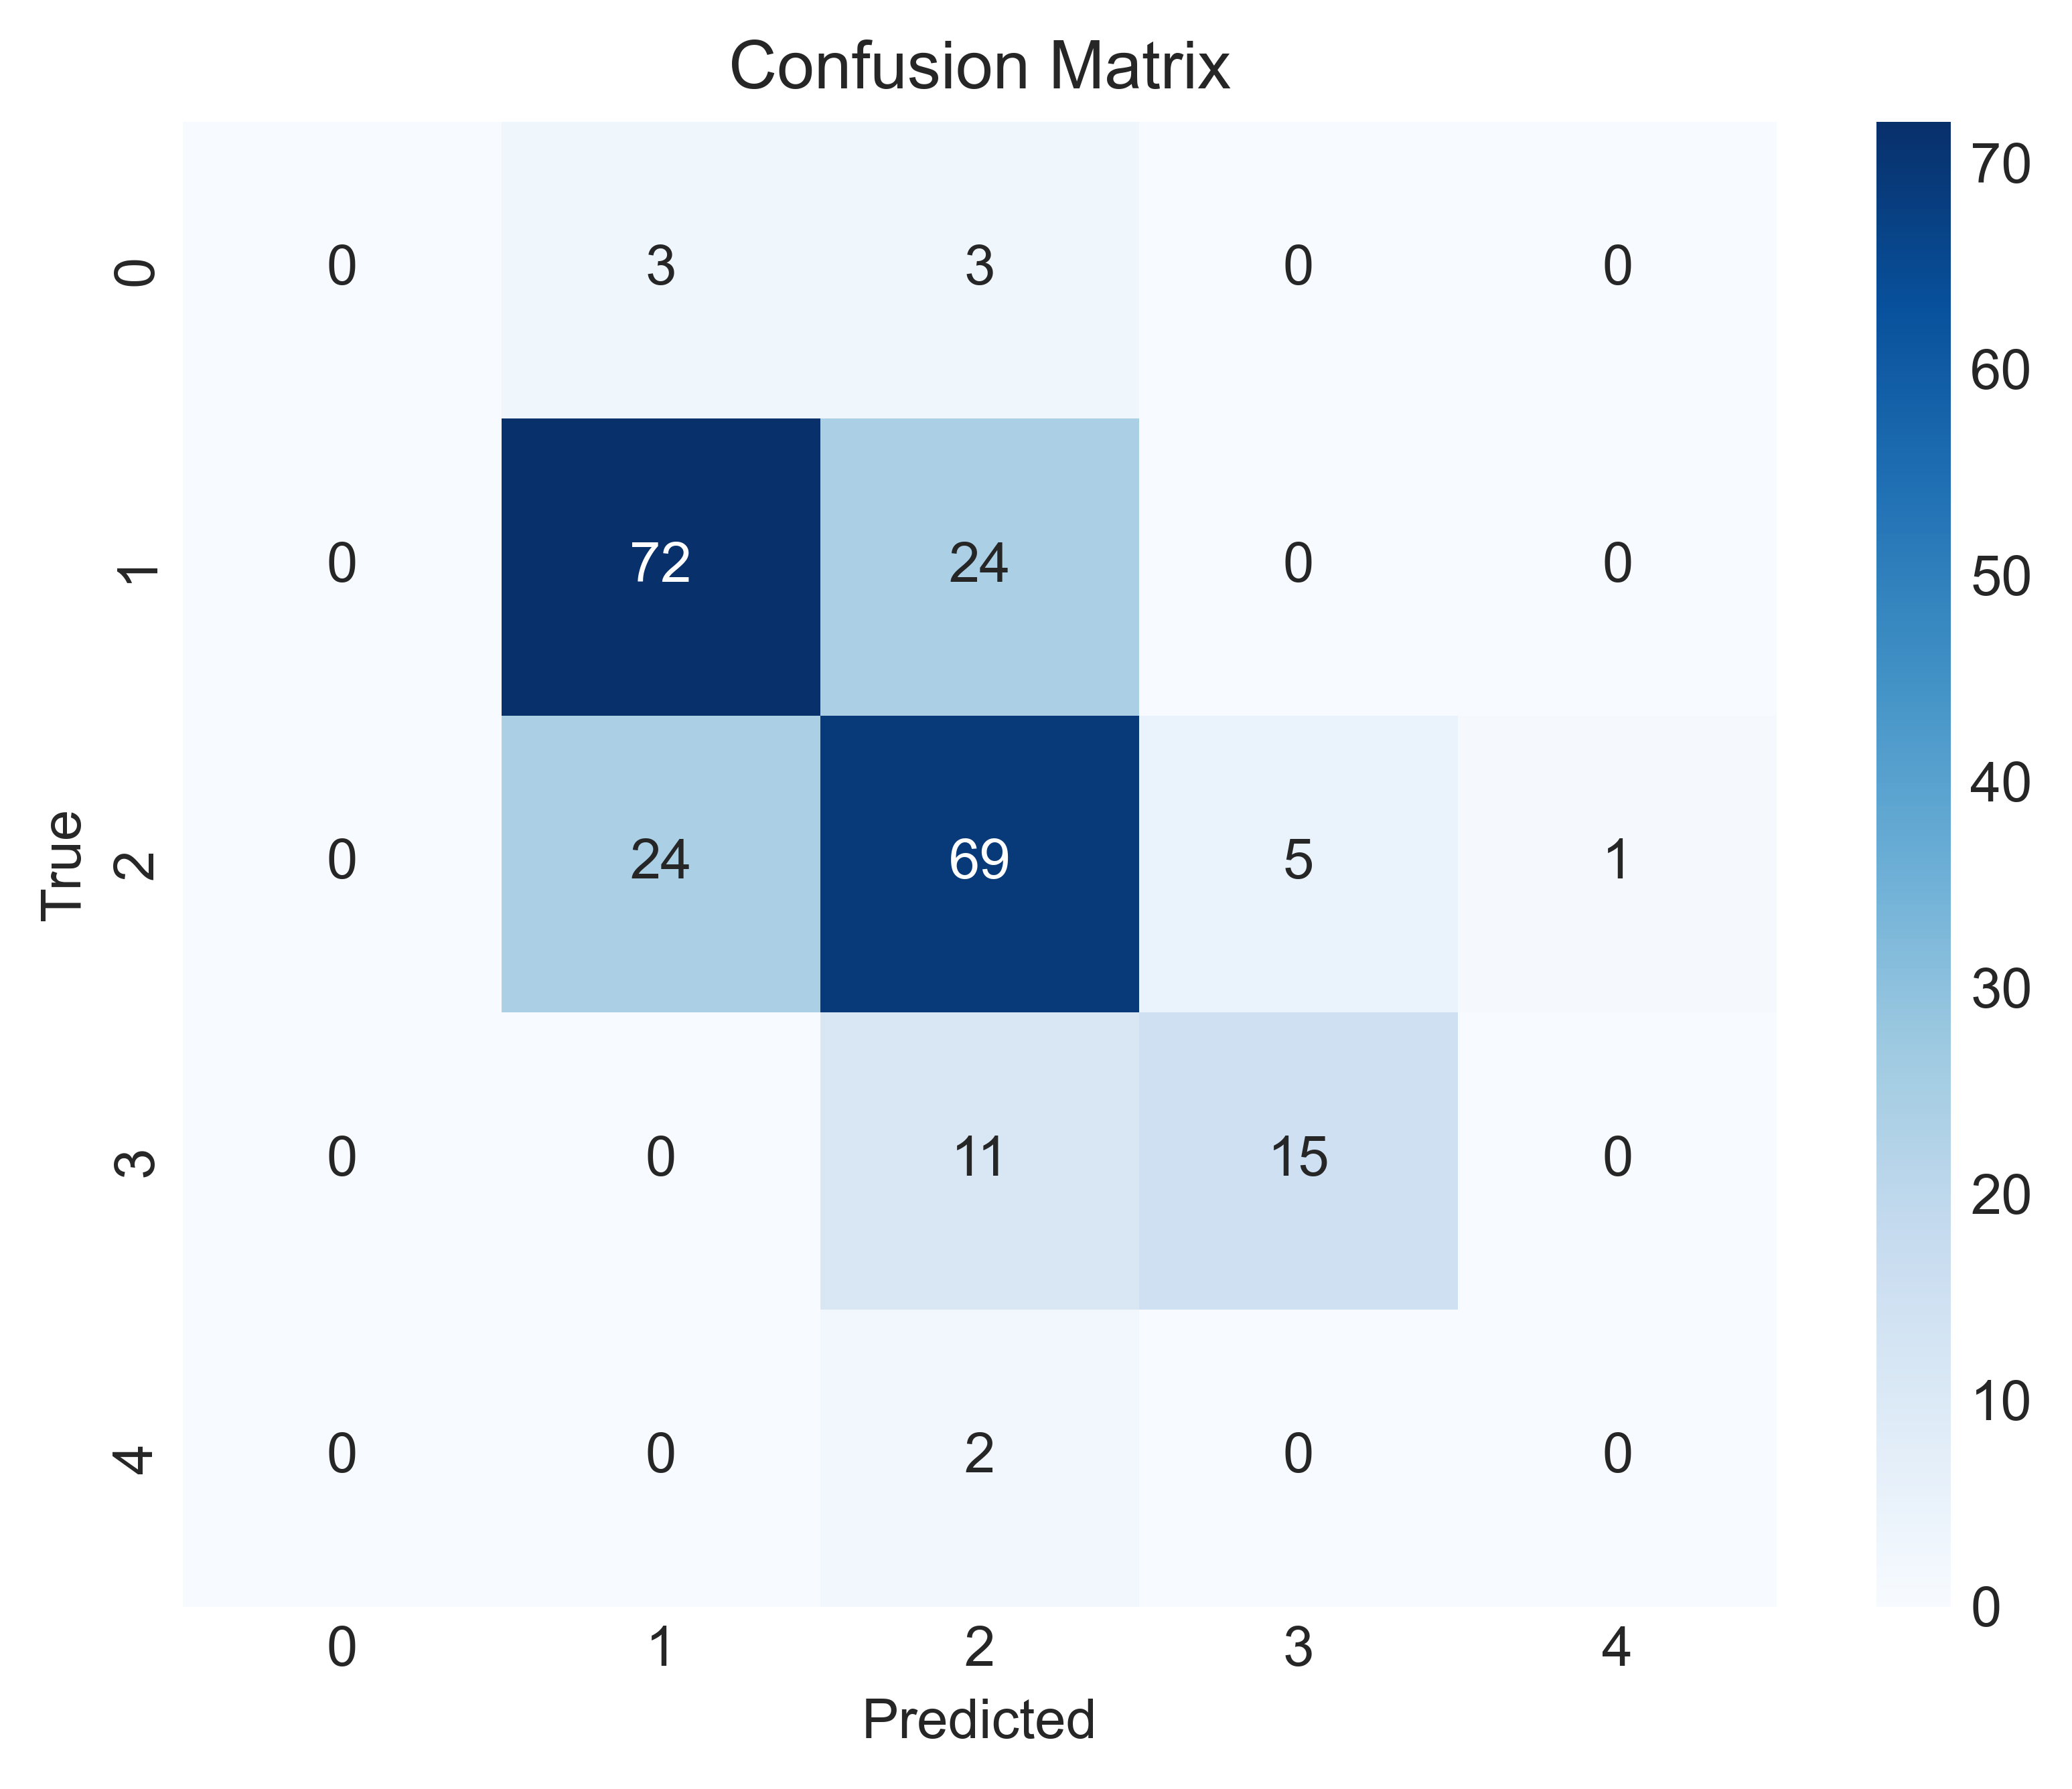

: 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Load the dataset
data = pd.read_csv('wineQT.csv')  # Replace with your dataset



# Split the dataset into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']


# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)


# Evaluate model performance
y_pred = rf_classifier.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
